# STA 141B: Midterm (or Super-Homework if you prefer)

### Worth 300 Points

Fall 2018

## Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: Bailey

Last Name: Wang

Student ID: 914955801

## Instructions

Please print your answer notebook to pdf (make sure that it is not unnecessarily long due to long output) and submit as the homework solution with your zip file.

For readability you,

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement
- you may add multiple cells between exercise cells

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

## Trans-Atlantic Slave Trade

In this homework, we will uncover some of the numbers behind the Trans-atlantic slave trade (TAST), also known as the middle passage, that brought African slaves to the Americas.  The middle passage is reported to have forcibly migrated over 10 million Africans to the Americas over a roughly 3 century time span.  Many aspects of the TAST is little known by most people, such as the countries that constituted this network of slave ships, the regions from which the slaves were taken, and the number of slaves captured from Africa.

This last number is especially important since the number of slaves taken from Africa can impact other estimates that result from this.  For example, when estimating the population of Africa in a given decade, demographers will use population growth models and more recent census data.  For example, there are roughly X number of people in Africa and such populations tend to grow at rate M.  Then if we want to calculate the population one century ahead then we just apply a simple formula that assumes that the population grows at this rate.  But if the population is being drained by the slave trade, then this number will tend to be underestimated because the growth rate is overestimated.  To account for this models need to take into account this drain on the population.

Throughout this homework you will need to follow the principles of graphical excellence and the grammar of graphics.  **Use only Plotnine for your graphics**, do not use Pyplot, Seaborn, or Plotly since they do not follow closely the grammar of graphics.  Be sure to include titles and necessary contextual captions.

**Warning:** The Trans-Atlantic Slave Trade remains one of the most horrific abuses of human rights in history.  This homework deals with the numbers behind this forced migration, please be aware that this is a sensitive topic for possibly yourself and others.   A suitable amount of respect and seriousness is required when dealing with this data.

**Exercise 1.** The data.

1. Read in the Trans-Atlantic Slave Trade database with Pandas.  Hint: if you use the unix tool `file` you can find that this CSV is encoded with iso-8859-1 character set.  Make sure that all missing values are encoded as NaN.
2. There is lots of missingness in this data, and some of these variables are imputed.  We will be imputing some of these variables ourselves, so delete any variable that ends with 'imp'.
3. Open up the pdf file: TAST_codebook.pdf which is the data dictionary for this and other related datasets.  Many of the variables in the codebook are not in this dataset because it is describing an updated dataset.
4. Create a list where you describe the meaning of the columns of your imported dataframe.  You can group similar columns together when describing their rough meaning, such as ownera,...,ownerp are owners of the slave ships.

Throughout we will disregard all time variables other than year since they are unreliable.

In [2]:
#Question 1

import pandas as pd
import numpy as np
import io
import plotnine as p9
from plotnine import ggplot, aes, geom_density, theme, element_text, geom_point, geom_line
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

%pwd()

data = pd.read_csv('tastdb-2010.csv', encoding="latin-1", 
                   na_values=' ', low_memory=False)

data=data.drop(columns=['natinimp','ptdepimp',
                        'mjbyptimp','mjslptimp',
                        'voy1imp', 'voy2imp',
                        'slaximp','vymrtimp','slamimp'])

data=data.replace(r'\s+',np.nan,regex=True) #fill all empty with NAs
#https://stackoverflow.com/questions/30392720/pandas-dataframe-replace-blanks-with-nan/35604582
#data.columns

* Voyageid: voyage identification
* evgreen: Voyage in 1999
* shipname: Name of vessel
* national: Country in which ship registered
* placcons: Where vessel constructed 
* yrcons: Year vessel construction 
* placreg: place of vessel registration
* yrreg: year of vessil registration
* rig: type of vessel
* tonnage: ton
* tonmode: British measured ton
* guns: gunsmounted
* owner: owner of venture
* fate: voyage outcome for owner, vessel if captured, or slaves
* resistance: African resistance
* placltra: First slave purchase location
* npafttra: port before crossing Atlantic
* sla1port: first slave landing
* adpsale: second slave landing
* portret: voyage ending
* yearam: year of arrival at port

* Date_dep: Date voyage began
* Date_buy: Date slave purchase began
* Date_leftAfr: Date vessel left last slave port
* Date_land1: Date slave first landed
* Date_depam: Date voyage return
* Date_end: Date voyage compeleted
* captaina: Captain's name
* crew: crew at voyage outset, crew at first landing
* crewdied: Crew died during complete voyage
* slintend: slaves intended for first port
* ncar13: slaves carried from first port
* tslavesd: total slaves on board at departure from last slave port
* slaarriv: total slaves arrived at first port
* slas32: slaves disembarked at first place
* menrat7: percentage of men at departure of arrival
* womrat7: percentage of women at departure of arrival
* boyrat7: percentage of boys at departure of arrival
* girlrat7: percentage of girls at departure of arrival
* malrat7: ratio of male at departure of arrival
* chilrat7: ratio of children at departure of arrival
* jamcaspr: Average price of slaves in Jamaica 
* vymrtrat: slave mortality rate
* sourcea: source of information


**Exercise 2.** First pass at estimating the total number of captives.

1. We will ultimately try to estimate the number of people captured into slavery and forced through the middle passage.  What variable would you use to estimate the total number of captives taken from Africa?  Let me call this variable Var A in this problem statement.   How much of the data for Var A is missing?
2. Create an initial estimate of the total number of captives taken from Africa by assuming that Var A is Missing Completely at Random.  
3. What other variables do you expect to be associated with Var A and why?  Give at least three possibilities.  Which will probably be the most strongly associated with this variable?  (I will be looking for a specific variable to be listed so be sure to think about the most strongly associated one.)

In [4]:
#Question 2
data2 = data.copy()
varA=data2["tslavesd"].isna().sum() #create sum for tslavesd with numbers
varA

np.mean(data2['tslavesd'])*data2.shape[0] #estimate total captives

11569160.328337597

There are 26732 entires with NA values. <p>
I used tslavesd to estimnate the number of slaves in the slave trade by taking the mean and multipling it by the length of the entire dataframe. <p>
    
The three possible associated variables with VarA that I choose are tonnage, slaarriv, and crew. Tonnage relates to the size of the vessel, since a larger ship will be able to carry more slaves. I think that crew is important, because the larger crew means there are more slaves on board the ship. Slaarriv is important because it shows the amount of slaves arriving at the first location which greatly relates to slavesd. 

**Exercise 3.** The flag that the ships flew.

1. We want to understand the trends of the nationality of the slave ships (the flag that they flew under is in the national variable).  Subselect the values of `national` that have more than 100 voyages with that value.  
2. Create a DataFrame that filters out the voyages where `national` does not have one of these values.  You should be retaining voyages with only these most common values.
3. Create a variable, `flag`, that is a string of easily readable names for these values by looking them up in the pdf codebook.
4. Using Plotnine, plot the counts of the voyages by flag as a function of voyage year.  Think about how best to display the count of a voyage by year and then how should you be including the flag variable.
5. In this plot, what are the geometric elements and aesthetic mappings?  What other components of the grammar of graphics are you using?
6. Do you observe any abrupt changes in the patterns of these counts for a given flag?  Investigate the cause for this change (using Google, etc.).

In [5]:
#Question 3.1-3.3

#Collabarated with Phoebe Zhang and Tiffany Chen

voyage_100 = data2.groupby(['national']).count() #count subset
voyage_100 = voyage_100.loc[voyage_100['voyageid'] > 100] #subset by greater than 100
voyage_100_ix = voyage_100.index #create index
voyage_100_from_data2 = data2.loc[data2['national'].
                                  isin(voyage_100_ix).dropna()].reset_index()
#apply new index onto dataframe

table = {1.0 : 'Spain', 4.0 : 'Portugal', 5.0 : 'Brazil', 7.0 : 'Great_Britain', 
         8.0 : 'Netherlands', 9.0 : 'USA', 10.0 : 'France', 11.0 : 'Denmark'}
#dictionary to convert float into str

voyage_100_from_data2['flag']=[table[row] for row in voyage_100_from_data2['national']]
#for loop to change float into str through dictionary

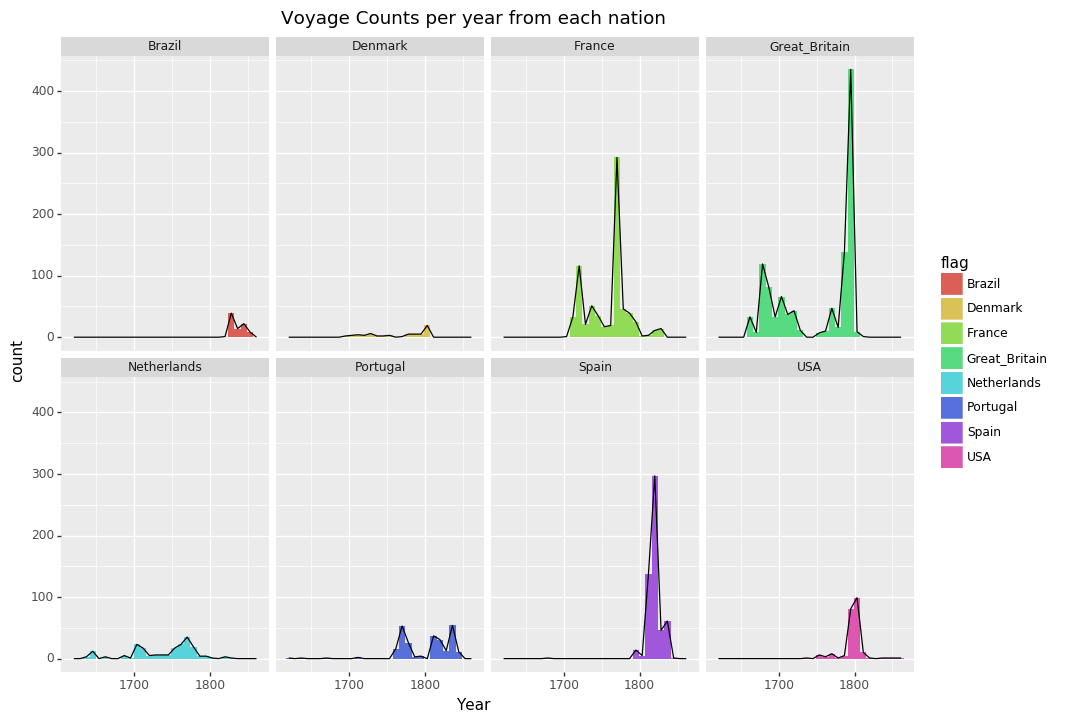

<ggplot: (295270499)>

In [53]:
#Question 3.4
(p9.ggplot(voyage_100_from_data2, aes(x='yearam',count='voyageid', fill='flag'))
+p9.geom_histogram()
+p9.geom_freqpoly(na_rm=True) 
+p9.facet_wrap('~flag', ncol=4)
+p9.theme(figure_size=(11,8))
+p9.xlab('Year')
+p9.ylab('count')
+p9.ggtitle('Voyage Counts per year from each nation'))

# Aesthetic 3.4

### Components

* voyage_100_from_data2 is a Pandas DataFrame
* 'yearam','voyageid', 'flag'
* geom_histogram create a histogram
* geom_freqpoly create the outline 

### Creating the plot
* data was used with the arguments x to yearam and count to voyageid with fill to flag
* figure size to enlarge the size of the graph
* figure size enlarged
* xlab, ylab, title to name them
* theme -- figure_size to enlarge the graph
* facet wrap seperates into multiple graphs dependent on flag

During the 1700s and 1800s was when the demand for slaves increased greatly due to the need for more plantation hands. A lot of the drop occurs during the late 1800s, since slavery is ending during that time period. Brazil, Denmark, and Spain all started late, because they had already banned slavery, therefore it shows the arrival of slaves.

**Exercise 4.** Looking at some of these ships.

1. Search for the slave ship mentioned in the following wikipedia article: https://en.wikipedia.org/wiki/Brookes_(ship) Hint: Look at all records of ships with 'Brook' in the name and try to match the characteristics to those described.  How many voyages for this ship are in the data (try to exclude ships with the same name)?
2. Create a variable that is True if there was a resistance (like a slave revolt) on the ship.  Plot the density of ships as a function of year with and without revolts and compare these distributions.
3. The movie Amistad was based on a real slave ship and slave uprising.  Read about it here: https://en.wikipedia.org/wiki/La_Amistad  Try to find this ship by searching for it by name and also searching for ships in the same 10 year period as this event with a slave resistance.  If you think you found it describe it, otherwise describe the events of another voyage that you did find.  

In [6]:
#Question 4.1

#https://www.encyclopediavirginia.org/_Description_of_the_Slave_Ship_Brookes_chapter_6_of_Liverpool_and_Slavery_by_a_Genuine_Dicky_Sam_1884?fbclid=IwAR1yEqorzYEj03BkrOaQJHFyWW5P8-SmzzTZ-hi8qWmKSzuZ03-AQkZlnaw
brook_data = data2[data2['shipname'].str.contains('Brook').fillna(False)] 
brook_data[brook_data['tonnage'] == 297] #find ship name, find tonnage

voyageid  evgreen shipname  national  placcons  yrcons  placreg  \
29534     80663      1.0   Brooks       7.0   10432.0  1781.0  10432.0   
29535     80664      1.0   Brooks       7.0   10432.0  1781.0  10432.0   
29536     80665      1.0   Brooks       7.0   10432.0  1781.0  10432.0   

        yrreg  rig  tonnage   ...              sourcei  \
29534  1781.0  4.0    297.0   ...        LST,1744-1786   
29535  1783.0  4.0    297.0   ...        LST,1744-1786   
29536  1783.0  4.0    297.0   ...    PP,1789(629),XXIV   

                               sourcej            sourcek sourcel  \
29534                        Crooks,55                NaN     NaN   
29535                Lambert,73,81-101  Lambert,73,109-21     NaN   
29536  Lambert,69,III,Appendix,Jamaica                NaN     NaN   

               sourcem sourcen sourceo sourcep sourceq sourcer  
29534  Williams,585-86     NaN     NaN     NaN     NaN     NaN  
29535              NaN     NaN     NaN     NaN     NaN     NaN  
29536     Williams,585     NaN     NaN     NaN     NaN     NaN  

[3 rows x 89 columns]

24 'Brookes' ships were created, the Wiki states that the ship's blueprints were published in 1788, therefore only the ships with NaN in their yrcons (vessel's constuction year) are removed. The Wiki states that Brookes did only 3 trips of which contained 638, 744, and 609 slaves.
Looking at the data for the slaves intended for the first port, the wiki states around 638, therefore, the ship that intended 700 slaves could be the Brookes from the Wiki. The final variable that was taken from another Wiki was that the tonnage was equal to 297. Therefore, it is dropped down to 3 options.

In [7]:
#Question 4.2
revolt_from_data2 = data2.copy()

revolt_from_data2['resistance_tf']=np.where(data2['resistance']>0, 'True','False')
#create boolean variable for resistance
revolt_from_data2 = revolt_from_data2[revolt_from_data2['Date_dep'].isna() == False]
revolt_from_data2['year_dep'] = revolt_from_data2['Date_dep'].apply(lambda x: x[-4:])
revolt_from_data2['year_dep'] = revolt_from_data2['year_dep'].astype(int)

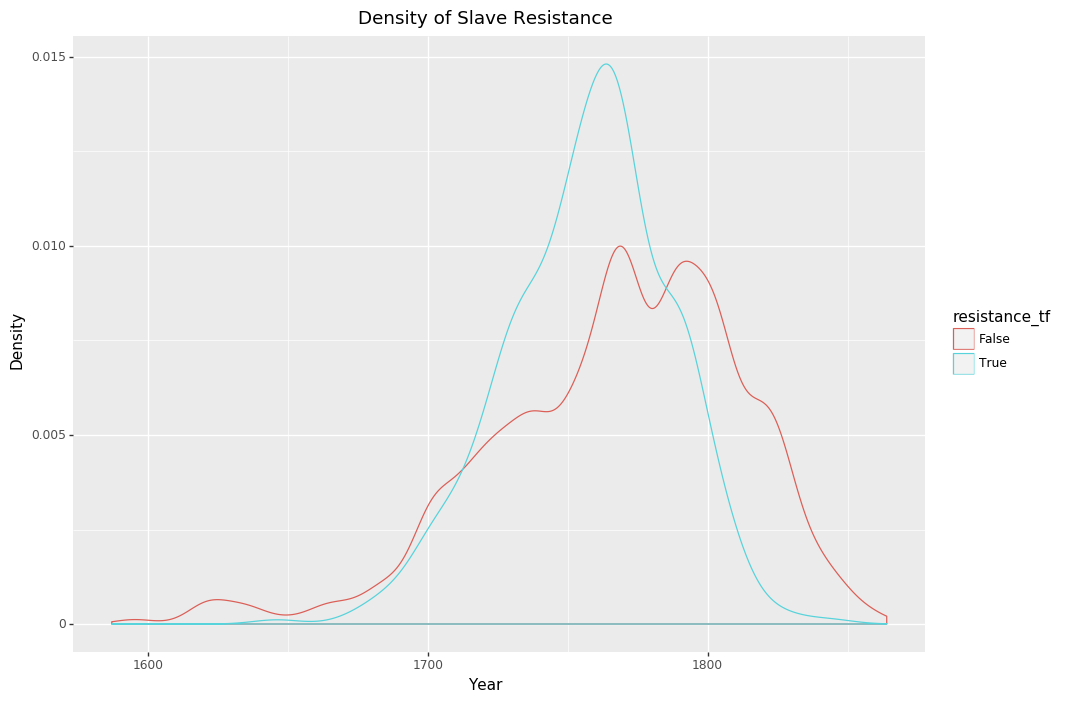

<ggplot: (7542363063)>

In [9]:
(p9.ggplot(revolt_from_data2, aes('year_dep',color='resistance_tf'))
+p9.geom_density()
+p9.theme(figure_size=(11,8))
+p9.xlab('Year')
+p9.ylab('Density')
+p9.labels.ggtitle('Density of Slave Resistance'))

Both distributions follow a left-skewed distribution. Slave resistances peaked around the 1750s, while the ones without has a two maximums. The portion of observations on the resistance is so small that it is difficult to give an accurate analysis on the densities.

In [10]:
#Question 4.3
amistad = data2[data2['shipname'].str.contains('Amistad').fillna(False)]
data2[(data2['yearam'] < 1849) & (data2['yearam'] > 1829) &
      (data2['resistance']== 1.0) & (data2['national'] == 1.0)] 
#find ship name, after checking use different conditions
#use years, and resistance and national

voyageid  evgreen shipname  national  placcons  yrcons  placreg  yrreg  \
2047      2071      1.0      NaN       1.0       NaN     NaN      NaN    NaN   

      rig  tonnage   ...    sourcei  sourcej sourcek sourcel sourcem sourcen  \
2047  2.0     45.0   ...        NaN      NaN     NaN     NaN     NaN     NaN   

     sourceo sourcep sourceq sourcer  
2047     NaN     NaN     NaN     NaN  

[1 rows x 89 columns]

First I searched based on the shipname, however, the descriptions did not match those in the Wiki link. Next I searched between the years and looked at resistances with Spanish national. Upon those criteria, I found the ship that closely matches the one from the Wiki.

**Exercise 5.** Other patterns.

1. The arrival and departure locations are quite detailed.  Look in the appendix of the codebook for the location codes.  Make a coarser version of both arrival and departure port variables (select just the last departure and first arrival) so that for example,  
```
30000 Caribbean 36100 Martinique 36101 Fort-Royale
```
is just encoded as '3' or Caribbean.
2. Plot the trend of voyages as a function of arrival location.  What trends do you see?
3. Do the same for departure location.
4. Plot the ratio of captives that are men as a function of year.  Include a smoother to describe the over all trend.  Also include in the plot another possible confounding variable.
5. Describe the geoms, aesthetic mappings, and other aspects of the plot.

In [20]:
#Question 5.1
data3 = data.copy()

arrival_1= data3['sla1port'].dropna()
arrival_1_ix = arrival_1.index
arrival_from_data2 = data3.loc[data3['sla1port'].
                               isin(arrival_1).dropna()].reset_index()

table_2 = {1.0 : 'Europe', 
           2.0 : 'North_America', 
           3.0 : 'Caribbean', 
           4.0 : 'Spanish_territory_America', 
           5.0 : 'Brazil', 
           6.0 : 'Africa', 8.0 : 'Other'}

arrival_from_data2['sla1port']=arrival_from_data2['sla1port'].apply(lambda x: x//10000)

arrival_from_data2['arrival_loc']=[table_2[row] for 
                                   row in arrival_from_data2['sla1port'] ]

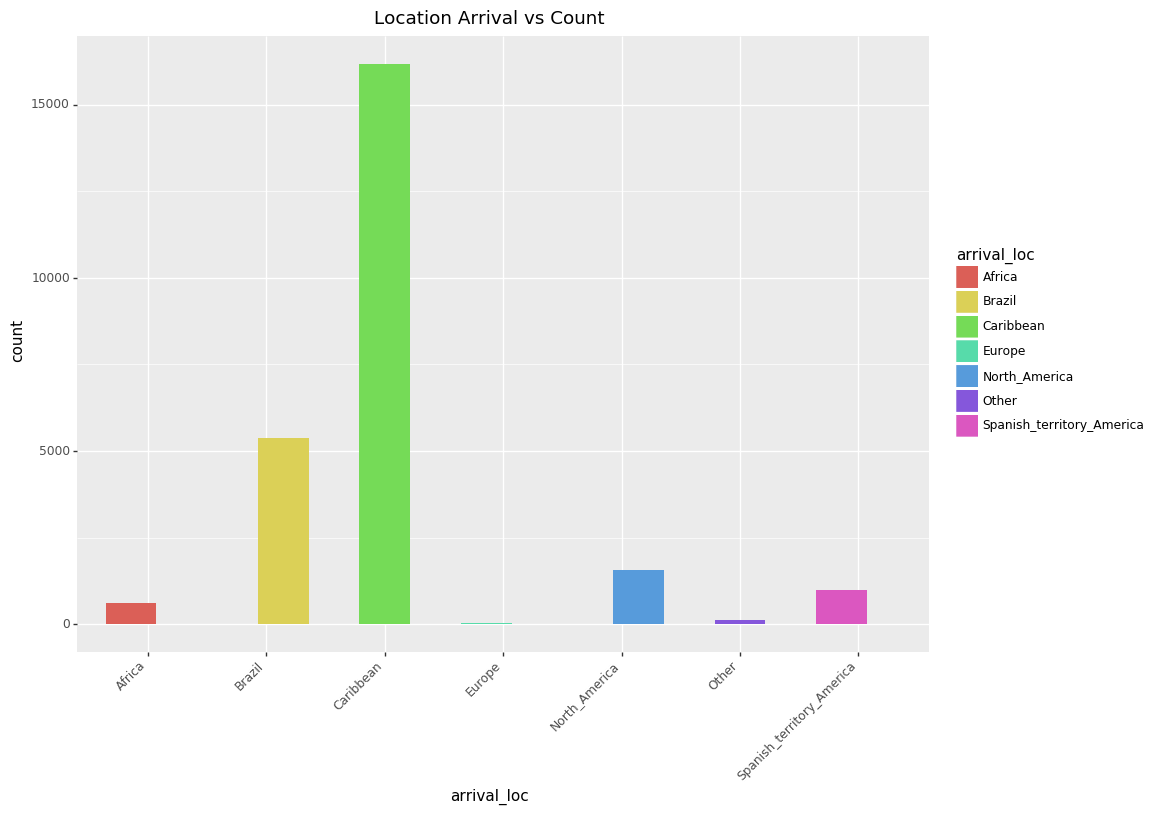

<ggplot: (295280339)>

In [21]:
#Question 5.2

(p9.ggplot(arrival_from_data2, aes('arrival_loc',count='voyageid', fill='arrival_loc'))
+p9.geom_histogram(bins=15,size=2)
+p9.theme(axis_text_x=element_text(rotation=45, hjust=1))
+p9.theme(figure_size=(11,8))
+p9.labels.ggtitle('Location Arrival vs Count'))

The vast majority of the arrivals are in the Caribbeans compared to all the other locations. It is surprising that Brazil has a higher arrival of slaves compared to the North America, since a lot of the slaves were used as plantation labor in the North America. However, it is not surprising that Africa and Europe had the lowest arrival, since all the departures come from Africa. Europe mostly exported slaves from Africa to other locations.

In [22]:
#Question 5.3

#Collabarated with Xiaoxi Liu
voyage_100_from_data2 = voyage_100_from_data2[voyage_100_from_data2['menrat7'].
                                              isna() == False]
voyage_100_from_data2['menrat7']=voyage_100_from_data2['menrat7'].astype(float)
voyage_100_men_from_data2= pd.DataFrame({'average_ratio' : 
                                         voyage_100_from_data2.
                                         groupby(['yearam','flag'])
                                         ['menrat7'].mean()}).reset_index()
#create new dataframe for average ratio by subsetting and taking mean

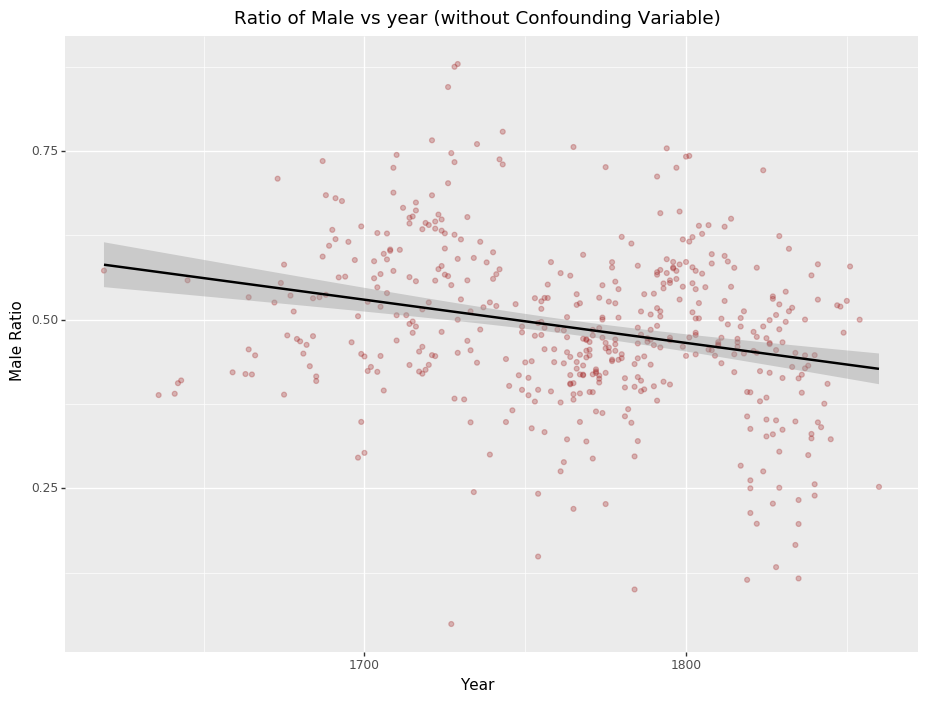

<ggplot: (290403960)>

In [23]:
#Question 5.4

(p9.ggplot(voyage_100_men_from_data2, aes('yearam','average_ratio'))
+p9.geom_point(color='brown', alpha=.3)
+p9.geom_smooth(method = 'lm')
+p9.theme(figure_size=(11,8))
+p9.xlab('Year')
+p9.ylab('Male Ratio')
+p9.labels.ggtitle('Ratio of Male vs year (without Confounding Variable)'))

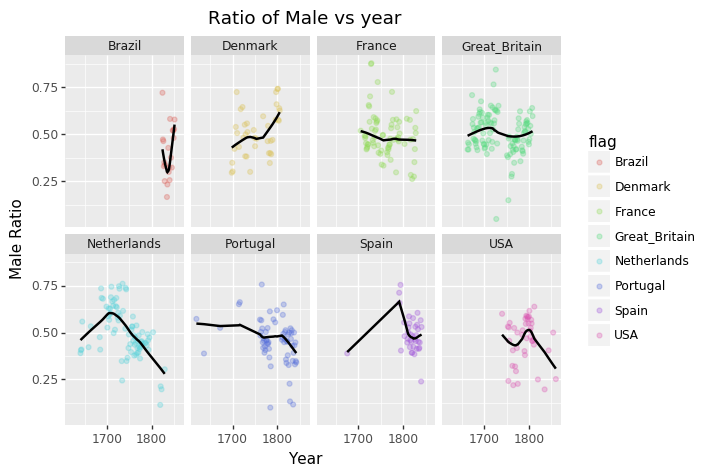

<ggplot: (-9223372036559414752)>

In [24]:
(p9.ggplot(voyage_100_men_from_data2, aes('yearam','average_ratio', color='flag'))
+p9.geom_point(alpha=.3)
+p9.geom_smooth(method = 'lowess', color='black')
+p9.facet_wrap('~flag',ncol=4)
+p9.xlab('Year')
+p9.ylab('Male Ratio')
+p9.labels.ggtitle('Ratio of Male vs year'))

The Netherlands, USA and Spain had the largest decreases of men taken. While Denmark, and Brazil had the increases. Surprisingly, France and Britain have a pretty plateau for men taken. The data has a lot of missing data, therefore the trend cannot be fully trusted.

# Aesthetic 5.2

### Components

* arrival_from_data2 is a Pandas DataFrame
* 'yearam', 'voyageid', 'arrival_loc'
* geom_histogram -- bins widen the size

### Creating the plot
* data was used with the arguments x to yearam and count to voyageid with fill to arrival_loc
* some of the points have color as an argument
* theme -- figure size enlarged
* theme -- element_text rotate the text
* xlab, ylab, title to name them


# Aesthetic 5.4

### Components

* voyage_100_from_data2 is a Pandas DataFrame
* 'yearam','average_ratio', 'flag'
* geom_point -- create scatterplot, alpha change color to opaque
* geom_smooth create nonlinear scatter smoothing

### Creating the plot
* data was used with the arguments x to yearam and y to average_ratio with color to flag
* figure size to enlarge the size of the graph
* figure size enlarged
* xlab, ylab, title to name them
* theme -- figure_size to enlarge the graph
* facet wrap seperates into multiple graphs dependent on flag

**Exercise 6.** Estimating total captives count I.

1. Plot the number of slaves at departure from last slaving and the number that arrived at the first port of disembarkation.  
2. Why do these variables concentrate near a line?  Most of the data lies on one side of the line, but a small fraction do not, what could have happened for those that did not?  Separate the data into these two populations.
3. For those voyages where the number of captives decreased (through death), calculate a death rate (ratio of captives that died).  
4. Plot this death rate as a function of year.  Make any appropriate scale transformations, and include a trend line or other smoother.  What is your interpretation?
5. Guess at two possible predictors and create visualizations that give you a sense of their association with the death rate.  Make sure that one of these is categorical, and plot it with the death rate and year so that there are three variables used in the same plot.
6. For these plots, list the geoms, aesthetic mappings, scales, and other notable aspects used.

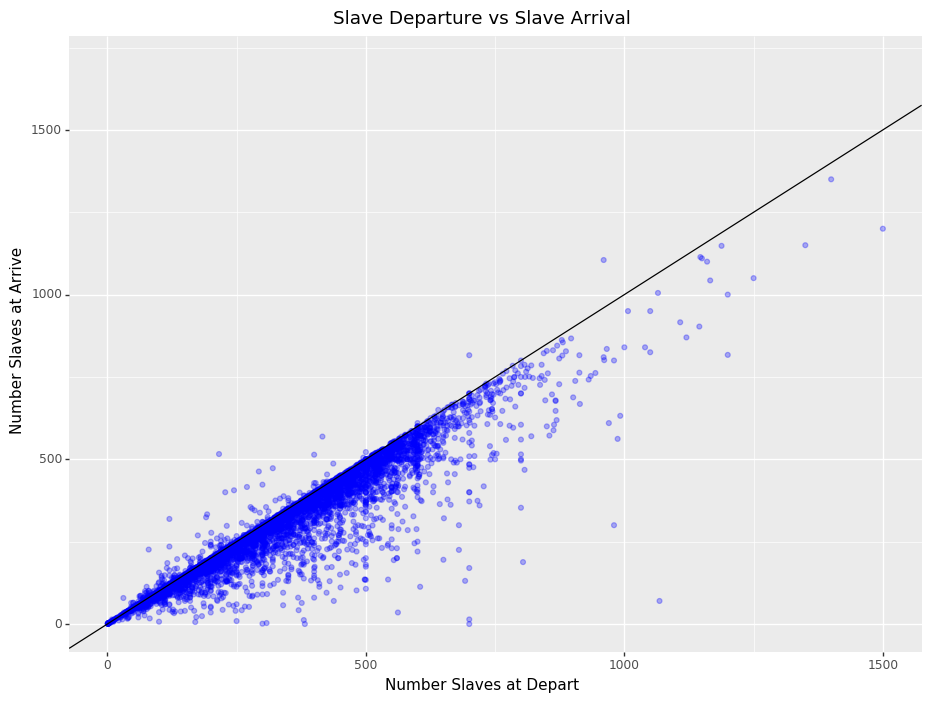

<ggplot: (292122923)>

In [28]:
#Question 6.1
data6=data.copy()

(p9.ggplot(data6, aes('tslavesd','slaarriv'))
+p9.geom_point(na_rm=True, alpha=.3, color='blue')
+p9.geom_abline(intercept=0, slope=1,color='black')
+p9.theme(figure_size=(11,8))
+p9.xlab('Number Slaves at Depart')
+p9.ylab('Number Slaves at Arrive')
+p9.labels.ggtitle('Slave Departure vs Slave Arrival'))

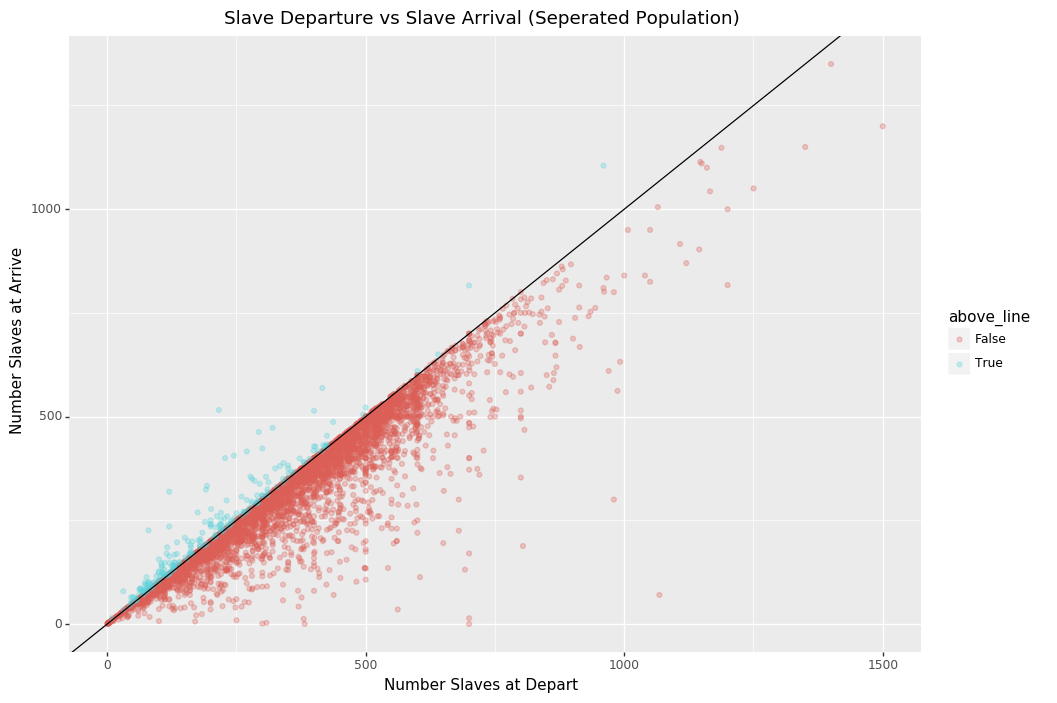

<ggplot: (-9223372036562650045)>

In [38]:
#Question 6.2

#Collabarated with Jared Yu, Tiffany Chen, Sangeetha Ramamurthy

#https://stackoverflow.com/questions/19991445/run-an-ols-regression-with-pandas-data-frame?fbclid=IwAR14oaT-k11bixUDWxl0oI2Coy0dwKyd9aUQYzGOCAe2JQ4x0yTZx5nSJo0

data_6_2_below = data6[data6['tslavesd'] >= data6['slaarriv']] #create below dataframe
data_6_2_above = data6[data6['slaarriv'] > data6['tslavesd']] #create above dataframe
data_6_2_above["above_line"] = True
data_6_2_below["above_line"] = False
data_6_3=pd.concat([data_6_2_above, data_6_2_below], axis=0)

(p9.ggplot(data_6_3, aes('tslavesd','slaarriv', color='above_line'))
+p9.geom_point(na_rm=True, alpha=.3)
+p9.geom_abline(intercept=0, slope=1,color='black')
+p9.theme(figure_size=(11,8))
+p9.xlab('Number Slaves at Depart')
+p9.ylab('Number Slaves at Arrive')
+p9.labels.ggtitle('Slave Departure vs Slave Arrival (Seperated Population)'))


The concentrate is due to the very close relationship between tslavesd and slaarriv. Since the points are close to the line, it means that the arrival and the departure are closely similar to each other. The ones on the line are equal to each other and the ones below meant that slaves died before arriving to their locations. However, it is possible to have more slaves as the last recorded locations may not be the last stop for the ship.

In [39]:
#Question 6.3

data_6_2_below = data6[data6['tslavesd'] >= data6['slaarriv']]
data_6_2_above = data6[data6['slaarriv'] > data6['tslavesd']]
data_6_2_above.shape 
data_6_2_below.shape

death_ratio =( sum(data_6_2_below['tslavesd'])-sum(data_6_2_below['slaarriv'])
             )/(sum(data_6_2_below['tslavesd'])) #create death ratio
death_ratio

0.12428683337095228

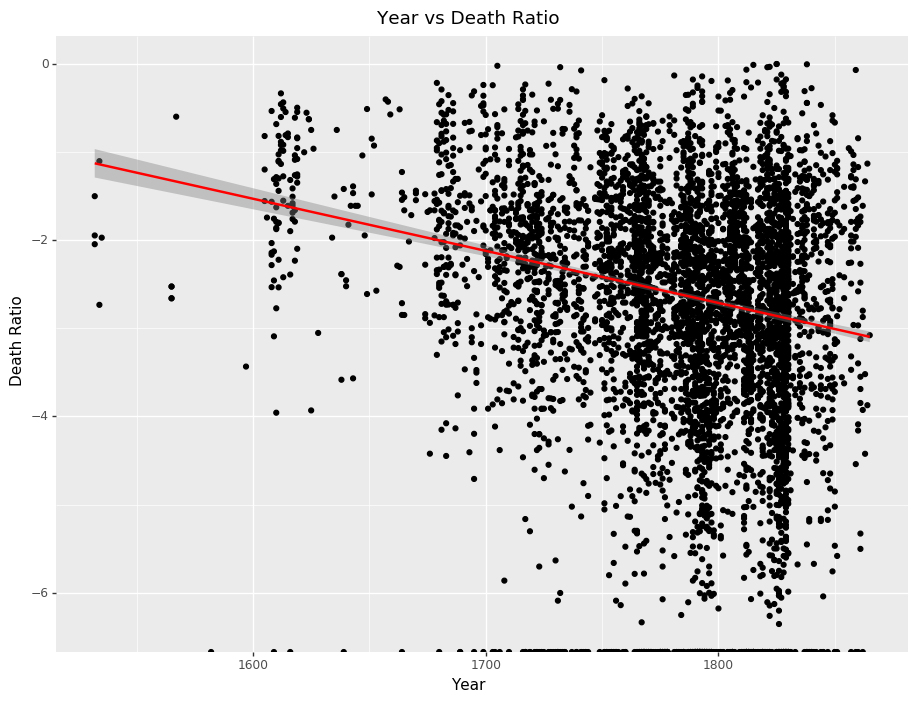

<ggplot: (-9223372036568736838)>

In [40]:
#Question 6.4

data_6_2_below['death_ratio']= (data_6_2_below['tslavesd'] - data_6_2_below['slaarriv']
                               )/(data_6_2_below['tslavesd'])
data_6_2_below['log_death_ratio']=np.log(data_6_2_below['death_ratio']) #take log

(p9.ggplot(data_6_2_below, aes('yearam','log_death_ratio'))
+p9.geom_point()
+p9.geom_smooth(method='lm',color='red',fill='grey')
+p9.theme(figure_size=(11,8))
+p9.xlab('Year')
+p9.ylab('Death Ratio')
+p9.labels.ggtitle('Year vs Death Ratio'))

Normality is violated, since the data seems to be left-skewed. The trend appears to be decreasing. However, homoscedasticity is violated. Therefore, it appears that applying a linear regression on this data is not the best method of analyzing the data.

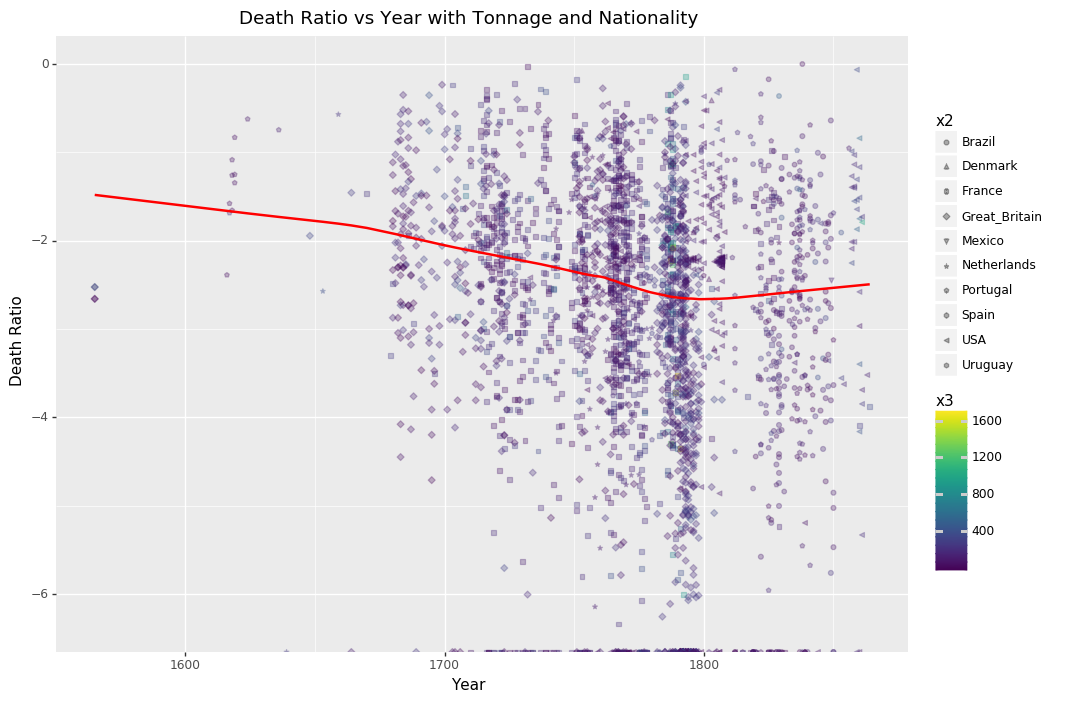

<ggplot: (-9223372029308920439)>

In [41]:
#Question 6.5

#Collabarated with Tiffany Chen and Sangeetha Ramamurthy

data8=data.copy()
data_6_5=data8[['slaarriv', 'tslavesd', 'yearam', 'national','tonnage']].dropna()
data_6_5_below = data_6_5[data_6_5['tslavesd'] >= data_6_5['slaarriv']]
data_6_5_above = data_6_5[data_6_5['slaarriv'] > data_6_5['tslavesd']]

data_6_5_below['death_ratio']= (data_6_5_below['tslavesd'] - data_6_5_below['slaarriv']
                               ) / (data_6_5_below['tslavesd'])
data_6_5_below['log_death_ratio']=np.log(data_6_2_below['death_ratio'])

table_4 = {1.0 : 'Spain', 2.0 : 'Uruguay', 4.0 : 'Portugal', 5.0 : 'Brazil', 
           7.0 : 'Great_Britain', 8.0 : 'Netherlands', 9.0 : 'USA', 
           10.0 : 'France', 11.0 : 'Denmark', 12.0 : 'Hanse_Town',
           13.0 : 'Sweden', 14.0 : 'Norway', 16.0 : 'Argentina', 
           17.0 : 'Russia', 18.0 : 'Sardinia',
           19.0 : 'Mexico', 24.0 : 'Genoa'}

data_6_5_below['flag']=[table_4[row] for row in data_6_5_below['national']]

data_6_6_below=pd.DataFrame({'x1' : data_6_5_below['yearam'],
                             'x2' : data_6_5_below['flag'],
                             'x3' : data_6_5_below['tonnage'],
                             'y' : data_6_5_below['log_death_ratio']})

(p9.ggplot(data_6_6_below, aes('x1','y'))
+p9.geom_point(aes(color='x3', shape='x2'),na_rm=True, alpha=.3)
+p9.geom_smooth(method='lowess',color='red')
+p9.theme(figure_size=(11,8))
+p9.xlab('Year')
+p9.ylab('Death Ratio')
+p9.labels.ggtitle('Death Ratio vs Year with Tonnage and Nationality'))

Brazil, USA are the only countires with slightly linear positive relationship between year and death ratio
Mexico and Uruguay only have one point. The rest of the countries have negative relationships between year and death ratio. It implies that captive deaths went down as the year went by. These countries are closer to Africa compared to Mexico and USA. <p>

These graphs are not good at showing the impact of tonnage. Ships that handle larger shipments of slaves than others provide higher death rates due to longer trips. 

# Aesthetic 6.1

### Components

* data6 is a Pandas DataFrame
* x1,x2,x3,x4
* Geom_point to create scatterplot, alpha change color to opaque
* geom_abline to create y=x line

### Creating the plot
* data was used with the arguments x1 to yearam, x2 to flag, x3 to tonnage
* color to flag
* theme -- figure size enlarged
* xlab, ylab, title to name them
* facet wrap seperates into multiple graphs dependent on flag

# Aesthetic 6.2

### Components

* data_6_3 is a Pandas DataFrame
* 'tslavesd','slaarriv', 'above_line'
* Geom_point to create scatterplot, alpha change color to opaque
* geom_abline to create y=x line

### Creating the plot
* data was used with the arguments x to tslavesd, y to slaarriv
* color to above_line
* theme -- figure size enlarged
* xlab, ylab, title to name them
* facet wrap seperates into multiple graphs dependent on flag

# Aesthetic 6.5

### Components

* data_6_6_below is a Pandas DataFrame
* x1, x2, x3, y
* Geom_point to create scatterplot, alpha change color to opaque, color and shape
* geom_smooth to create non-linear scatterplot smoothing

### Creating the plot
* data was used with the arguments x1 to yearam, x2 to flag, x3 to tonnage y to slaarriv
* theme -- figure size enlarged
* xlab, ylab, title to name them
* facet wrap seperates into multiple graphs dependent on flag

**Exercise 7.** Estimating total captives count II.

1. Using the variables selected, fit a prediction of death rate using linear regression and some simple transformations/scales.  You do not need to spend time doing automated model selection, just include the most likely predictor or predictors from the previous question.
2. We will impute the number of captives on board at departure, so enumerate the cases for missingness of the variables involved in the prediction.
3. We would like to predict the number of captives on departure from the number that arrived with the following formula,
$$
\textrm{arrived} = \pi (1 - \textrm{death rate}) \cdot (\textrm{captives taken}) + (1- \pi) (\textrm{average increase})
$$
where $\pi$ is the proportion of voyages with no increase in captives, and the average increase is over those that did see an increase. 
For those voyages with captives taken missing and arrived not missing, use the estimated death rate to predict the captives taken.
4. Impute the remainder by predicting the captives taken with the year variable, you can use simple linear regression.
5. With the same formula and method impute the number of captives upon arrival whenever it is missing.
6. Give a new estimate of the predicted total number of captives taken on the middle passage, the total number of deaths, and the overall death rate.  How does this differ from your first estimate obtained by assuming MCAR?

In [42]:
#Question 7.1

#Collabarated with Tiffany Chen and Sangeetha Ramamurthy
data_7_below=pd.DataFrame({'x1' : data_6_5_below['yearam'],
                           'x2' : data_6_5_below['flag'],
                           'x3' : data_6_5_below['tonnage'],
                           'y' : data_6_5_below['death_ratio']})

model_1=smf.ols(formula='y~x1+x2+x3', data=data_7_below, missing='drop').fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     13.84
Date:                Mon, 05 Nov 2018   Prob (F-statistic):           3.01e-26
Time:                        15:16:17   Log-Likelihood:                 1580.4
No. Observations:                2867   AIC:                            -3137.
Df Residuals:                    2855   BIC:                            -3065.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.5912      0.143     11.114      0.000       1.310       1.872
x2[T.Denmark]           0.1192      0.055      2.184      0.029       0.012       0.226
x2[T.France]           -0.0237      0.015     -1.541      0.123      -0.054       0.006
x2[T.Great_Britain]    -0.0328      0.015     -2.149      0.032      -0.063      -0.003
x2[T.Mexico]            0.0108      0.140      0.077      0.939      -0.264       0.286
x2[T.Netherlands]      -0.0351      0.022     -1.606      0.108      -0.078       0.008
x2[T.Portugal]          0.0272      0.017      1.619      0.105      -0.006       0.060
x2[T.Spain]             0.0330      0.020      1.641      0.101      -0.006       0.072
x2[T.USA]               0.0477      0.016      2.986      0.003       0.016       0.079
x2[T.Uruguay]          -0.0375      0.140     -0.267      0.790      -0.313       0.238
x1                     -0.0008   7.79e-05    -10.585      0.000      -0.001      -0.001
x3                   5.552e-05   1.95e-05      2.846      0.004    1.73e-05    9.38e-05
==============================================================================
Omnibus:                     1209.374   Durbin-Watson:                   1.788
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5340.628
Skew:                           2.045   Prob(JB):                         0.00
Kurtosis:                       8.290   Cond. No.                     9.86e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
#Question 7.2

data9=data.copy()
data9=data9.fillna(-1)

data9.head()

voyageid  evgreen    shipname  national  placcons  yrcons  placreg  yrreg  \
0         1      1.0          -1       4.0      -1.0    -1.0     -1.0   -1.0   
1         2      1.0     Tibério      -1.0      -1.0    -1.0     -1.0   -1.0   
2         3      1.0          -1      -1.0      -1.0    -1.0     -1.0   -1.0   
3         4      1.0          -1      -1.0      -1.0    -1.0     -1.0   -1.0   
4         5      1.0  Benigretta      -1.0      -1.0    -1.0     -1.0   -1.0   

    rig  tonnage   ...    sourcei  sourcej sourcek sourcel sourcem sourcen  \
0  40.0     -1.0   ...         -1       -1      -1      -1      -1      -1   
1  40.0     -1.0   ...         -1       -1      -1      -1      -1      -1   
2  40.0     -1.0   ...         -1       -1      -1      -1      -1      -1   
3  40.0     -1.0   ...         -1       -1      -1      -1      -1      -1   
4  25.0     -1.0   ...         -1       -1      -1      -1      -1      -1   

  sourceo sourcep sourceq sourcer  
0      -1      -1      -1    -1.0  
1      -1      -1      -1    -1.0  
2      -1      -1      -1    -1.0  
3      -1      -1      -1    -1.0  
4      -1      -1      -1    -1.0  

[5 rows x 89 columns]

We used -1 to ennurmance the data since nothing in this data unless transformed is -1. It will be simple to replace with imputed data.

In [44]:
#Question 7.3

#Collabarated with Tiffany Chen

pie = len(data_6_5_below)/(len(data_6_5_below) + len(data_6_5_above))
death_rate = (sum(data_6_5_below['tslavesd']) - (sum(data_6_5_below['slaarriv']))
             )/sum(data_6_5_below['tslavesd'])
average_increase = np.mean(data_6_5_above['slaarriv']-data_6_5_above['tslavesd'])

for row in range(len(data9)):
    if(data9.loc[row, 'tslavesd']==-1.0) & (data9.loc[row, 'slaarriv'] != -1.0):
        data9.loc[row, 'tslavesd'] = data9.loc[row, 'slaarriv'] / (1-death_rate)

In [46]:
#Question 7.4

#Collabarated with Tiffany Chen and Sangeetha Ramamurthy

arrived_imp = data9[data9['tslavesd'] >=0]
model_2=sm.OLS(arrived_imp['tslavesd'],arrived_imp['yearam'],  missing='drop').fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               tslavesd   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                 6.560e+04
Date:                Mon, 05 Nov 2018   Prob (F-statistic):               0.00
Time:                        15:17:03   Log-Likelihood:            -1.3572e+05
No. Observations:               20586   AIC:                         2.715e+05
Df Residuals:                   20585   BIC:                         2.715e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
yearam         0.1781      0.001    256.133      0.000       0.177       0.179
==============================================================================
Omnibus:                     3719.065   Durbin-Watson:                   1.165
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9557.971
Skew:                           0.994   Prob(JB):                         0.00
Kurtosis:                       5.681   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
#Question 7.5

#Collabarated with Tiffany Chen

for row in range(len(data9)):
    if data9.loc[row,'tslavesd'] == -1.0:
        data9.loc[row, 'tslavesd'] = model_2.predict(data9.loc[row, 'yearam'])
        
data9['tslavesd'].isna().value_counts()

False    34941
Name: tslavesd, dtype: int64

In [48]:
#Collabarated with Tiffany Chen

for row in range(len(data9)):
    if data9.loc[row,'slaarriv'] == -1.0:
        data9.loc[row, 'slaarriv'] = (pie*(1-death_rate)*
                                      data9.loc[row, "tslavesd"]
                                     ) + ((1- pie)*average_increase)
        
data9['slaarriv'].isna().value_counts()

False    34941
Name: slaarriv, dtype: int64

In [49]:
#Question 7.6

#Collabarated with Tiffany Chen

estimate_captive=data9['tslavesd'].sum()
data9=data9[data9["tslavesd"] >= data9["slaarriv"]]
estimate_death=data9['tslavesd'].sum()-data9['slaarriv'].sum()
estimate_death_rate = estimate_death/estimate_captive

Estimate captive: 10971163.556957753 <p>
Initial captive: 11569160.328337597 <p>
Estimate deaths: 1650046.2795754727 <p>
Estimate death rate: 0.1503984760603662 <p>
Initial death rate: 0.12428683337095228 <p>
The inital estimate was using simple mathematical multiplication, while the estimate uses a simple linear regression to fill in the NA values. Therefore, the model we used is not the best and there can be a better model.